# Plotting:   HW10

CUNY MSDA - DATA 602: Advanced Programming Techniques <br>
_Author - Walt Wells_

## Setup 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText
import scipy.ndimage as ndimage
import scipy.misc as misc
import re
from StringIO import StringIO

## setup raw file locations for each problem
raw1 = '../L03/cars.data.csv'
raw2 = '../L05/brainandbody.csv'
raw3 = '../L08/objects.png'
raw4 = '../L09/epa-http.txt'

In this homework we will explore the matplotlib library and its features by 
plotting the results of previous assignments.  

## 1) Cars Data

Express the cars.data.csv data as a series of bar graphs.  The x-axis represents a feature and the y-axis is the frequency in the sample.  Do this with the 'buying', 'maint', 'safety', and 'doors' fields with one plot for each for a total of four.  Make each graph a subplot of a single output.  

In [2]:
cars = pd.read_csv(raw1, names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
print cars.head(5)
cars.shape

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


(1728, 7)

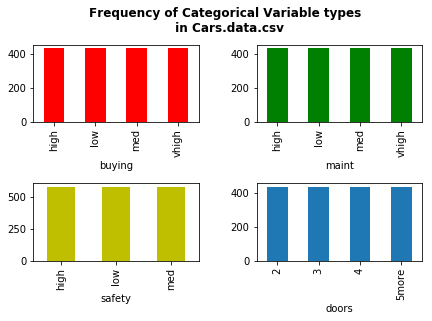

In [3]:
for col in ['buying', 'maint', 'safety', 'doors']:
    cars[col] = cars[col].astype('category')

plt.figure(1)
plt.suptitle('Frequency of Categorical Variable types \n in Cars.data.csv', fontweight='bold')
plt.subplot(221)
cars.groupby('buying').size().plot(kind='bar', color='r')
plt.subplot(222)
cars.groupby('maint').size().plot(kind='bar', color='g')
plt.subplot(223)
cars.groupby('safety').size().plot(kind='bar', color='y')
plt.subplot(224)
cars.groupby('doors').size().plot(kind='bar')
plt.subplots_adjust(top=.85, bottom=0.1, left=0.05, right=0.95, hspace=0.8,
                    wspace=0.35)

In [4]:
# why do these look the same for each var?  oh.  because they are. 
for col in ['buying', 'maint', 'safety', 'doors']:
    x = cars.groupby(col).size()
    print x.to_frame('counts')

        counts
buying        
high       432
low        432
med        432
vhigh      432
       counts
maint        
high      432
low       432
med       432
vhigh     432
        counts
safety        
high       576
low        576
med        576
       counts
doors        
2         432
3         432
4         432
5more     432


## 2)  Linear Regression

Plot your results from the linear regression in homework 5 and 7 (for any of the provided data sets).  The plot should include.  1) a scatter of the points in the .csv file 2) a line showing the regression line (either from the calculation in homework 5 or line-fitting from homework 7).  3) something on the plot that specifies the equation for the regression line.  

In [5]:
animals = pd.read_csv(raw2, names = ['animal', 'body', 'brain'], skiprows=1)
print animals.head(5)

                      animal   body  brain
0  Lesser short-tailed shrew  0.005   0.14
1           Little brown bat  0.010   0.25
2              Big brown bat  0.023   0.30
3                      Mouse  0.023   0.40
4                 Musk shrew  0.048   0.33


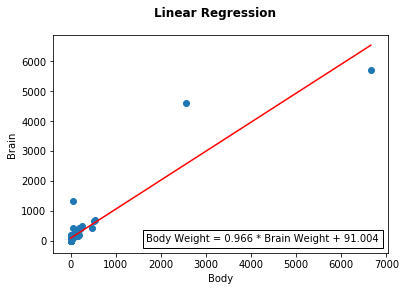

In [6]:
## Linear Regression
def lin_func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(lin_func, animals.body, animals.brain)
equ = 'Body Weight = %s * Brain Weight + %s' % (popt[0].round(3), popt[1].round(3))

## Plot
fig, ax = plt.subplots()
ax.plot(animals.body, popt[0] * animals.body + popt[1], color='red')
ax.scatter(animals.body, animals.brain)
plt.ylabel('Brain')
plt.xlabel('Body')
fig.suptitle('Linear Regression', fontweight="bold")
anchored_text = AnchoredText(equ, loc=4)
ax.add_artist(anchored_text)
plt.show()

## 3)  Objects.png center points

Create an overlay of the center points found in objects.png from homework 8.  The image should be in the background and the object centers can be small circles or points at or around the center points.

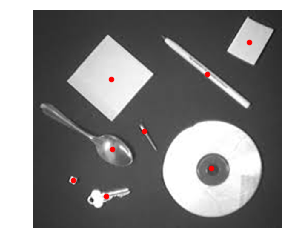

In [7]:
obj = misc.imread(raw3)
filt = ndimage.gaussian_filter(obj, 8)
T = filt > filt.mean()
labels, count = ndimage.label(T)
centers = ndimage.center_of_mass(T, labels, range(1, count +1, 1))
centers = np.array(centers)

x = centers[:,1]
y = centers[:,0]

fig, ax = plt.subplots()
ax.imshow(obj)
ax.scatter(x, y ,s=20, color='red')
plt.axis('off')
plt.show()

## 4)  HTTP Request Time Series

Plot a line graph that shows the hour by hour change in number of server requests from the HTTP in homework 9.  The x-axis is the discrete hour intervals (e.g. 13:00 – 14:00) and the y-axis is the number of requests.  

In [8]:
with open(raw4) as f:
    raw = f.read()
pattern = r'(\" )(?=HTTP)'  
fixed = re.sub(pattern, '', raw) 
df = pd.read_csv(StringIO(fixed), sep='\s+', header=None, na_values="-",
names = ['host', 'date', 'request', 'reply', 'bytes']) 

# clean for date to get hour
df['date'] = pd.to_datetime(df['date'], format='[%d:%H:%M:%S]')
df['hour'] = pd.DatetimeIndex(df['date']).hour
del df['date']
df.head(5)

,host,request,reply,bytes,hour
0,141.243.1.172,GET /Software.html HTTP/1.0,200,1497.0,23
1,query2.lycos.cs.cmu.edu,GET /Consumer.html HTTP/1.0,200,1325.0,23
2,tanuki.twics.com,GET /News.html HTTP/1.0,200,1014.0,23
3,wpbfl2-45.gate.net,GET / HTTP/1.0,200,4889.0,23
4,wpbfl2-45.gate.net,GET /icons/circle_logo_small.gif HTTP/1.0,200,2624.0,23


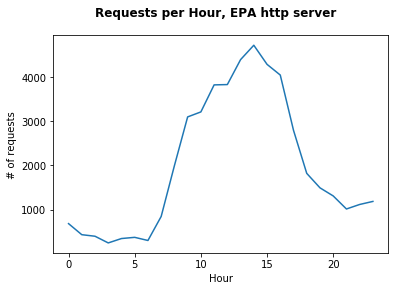

In [9]:
hourly = pd.Series(df['hour'])
hourly = hourly.value_counts()
hourly = hourly.sort_index()

fig, ax = plt.subplots()
fig.suptitle("Requests per Hour, EPA http server", fontweight='bold')
ax.plot(hourly)
plt.xlabel("Hour")
plt.ylabel("# of requests")
plt.show()

## References

* http://stamfordresearch.com/linear-regression-using-pandas-python/
* http://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
* http://pythonvision.org/basic-tutorial/